In [1]:
import pandas as pd
import umap
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt

/home/gridsan/djuna/.local/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/gridsan/djuna/.local/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/gridsan/djuna/.local/lib/python3.8/site-packages/umap/distances.py:1086: NumbaDepr

In [2]:
reducer = umap.UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=30, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=2, n_components=2, n_epochs=1000,
     n_neighbors=50, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1,
     set_op_mix_ratio=1.0, spread=10, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)#, disconnection_distance=5)

In [17]:
expression = pd.read_csv('./processed_data/single_cell/all_scores.csv', index_col=0)


In [18]:
fgsea = pd.read_csv('./processed_data/for_plotting/fgsea_out.csv', index_col=0, encoding='windows-1254')
sele_paths = set(fgsea['pathway'])
leading_edge = pd.read_csv( './processed_data/for_plotting/leading_edge.csv', index_col=0)

In [19]:
genes = np.array(leading_edge['gene'])
M = np.array(expression.loc[genes])

In [6]:
embedding = reducer.fit_transform(M)

/home/gridsan/djuna/.local/lib/python3.8/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/home/gridsan/djuna/.local/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [20]:
show = set(genes[np.argsort(np.abs(M[:,0]))][:10])

In [22]:
COL = 'PuOr_r'#C2[i]
cm = plt.cm.get_cmap(COL, embedding.shape[0])
colors = [cm(int(x)) for x in range(embedding.shape[0])]

/state/partition1/slurm_tmp/23584161.0.0/ipykernel_10717/1407584370.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap(COL, embedding.shape[0])


In [24]:
celltypes = np.array(expression.columns)

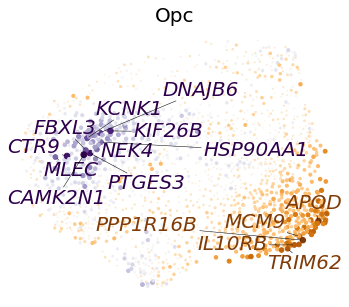

<Figure size 432x288 with 0 Axes>

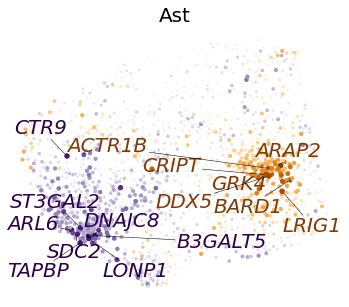

<Figure size 432x288 with 0 Axes>

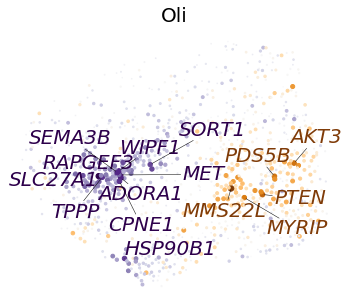

<Figure size 432x288 with 0 Axes>

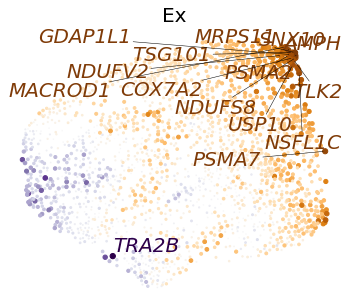

<Figure size 432x288 with 0 Axes>

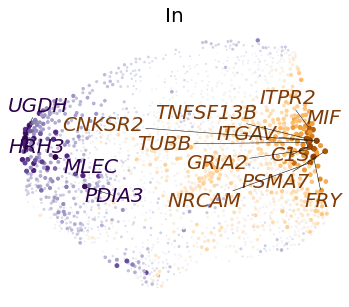

<Figure size 432x288 with 0 Axes>

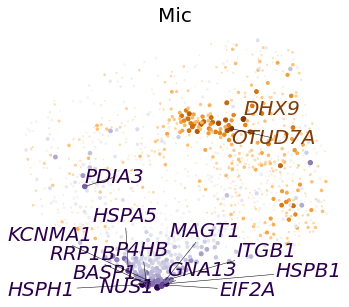

<Figure size 432x288 with 0 Axes>

In [25]:
from adjustText import adjust_text

celltypes = np.array(expression.columns)

for i, cell in enumerate(celltypes):
    plt.figure(figsize = (6,5))

    plt.scatter(embedding[:,0], embedding[:,1], c=M[:,i], cmap=COL, s = np.abs(M[:,i]*10))
    texts = []
    show = set(genes[np.argsort(-1*np.abs(M[:,i]))][:15])
    #order = np.argsort(-1*(M[:,i]))
    for x, txt in enumerate(genes):
         if txt in show:
            #C = colors[np.where([x in set([txt]) for x in list(show2)])[0][0]]
            w = np.where([f==txt for f in genes])[0][0]
            if M[x,i]<0:
                texts.append(plt.text(embedding[x,0], embedding[x,1], txt, style='italic', color = colors[0], fontsize=20))
            else:
                texts.append(plt.text(embedding[x,0], embedding[x,1], txt, style='italic', color = colors[-1], fontsize=20))
                
    adjust_text(texts, force_points=0.2, force_text=0.2,
            expand_points=(1, 1), expand_text=(1, 1),
            arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
    
    a = plt.gca()
    a.axis('off')
    plt.title(cell, fontsize=20)
    plt.savefig('./pdf_figures//'+str(cell)+'umap.pdf')
    plt.figure()
    

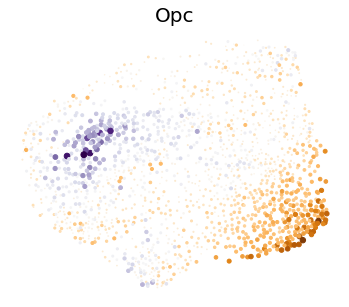

<Figure size 432x288 with 0 Axes>

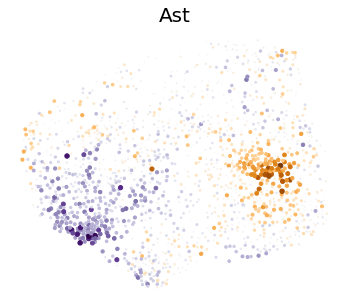

<Figure size 432x288 with 0 Axes>

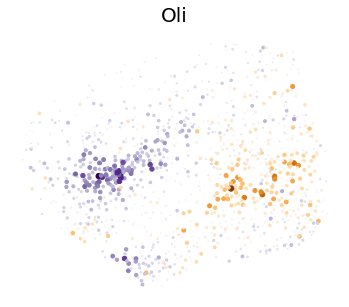

<Figure size 432x288 with 0 Axes>

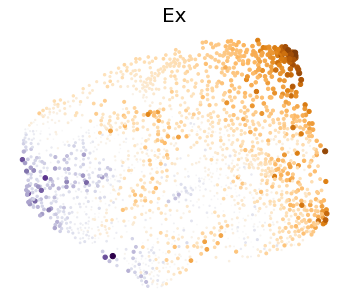

<Figure size 432x288 with 0 Axes>

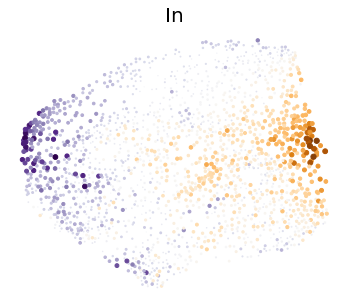

<Figure size 432x288 with 0 Axes>

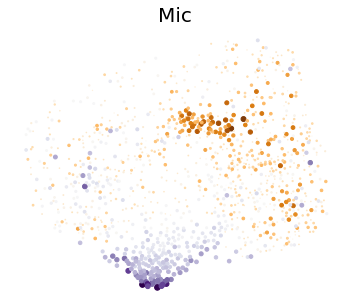

<Figure size 432x288 with 0 Axes>

In [26]:

celltypes = np.array(expression.columns)

for i, cell in enumerate(celltypes):
    plt.figure(figsize = (6,5))

    plt.scatter(embedding[:,0], embedding[:,1], c=M[:,i], cmap='PuOr_r', s = np.abs(M[:,i]*10))
    a = plt.gca()
    a.axis('off')
    plt.title(cell, fontsize=20)
    plt.savefig('./pdf_figures//'+str(cell)+'umap.pdf')
    plt.figure()
    

In [ ]:
Ex'#4DBBD5FF'In'#00A087FF'Ast'#E64B35FF'Mic'#3C5488FF'Oli'#F39B7FFF'Opc'#8491B4FF'


In [37]:
celltypes

array(['Opc', 'Ast', 'Oli', 'Ex', 'In', 'Mic'], dtype=object)

In [44]:
from matplotlib.colors import LinearSegmentedColormap

cm0 = LinearSegmentedColormap.from_list(
        'test', [("#FFFFFF"),("#8491B4FF")], N=10)

cm1 = LinearSegmentedColormap.from_list(
        'test', [("#FFFFFF"),("#E64B35FF")], N=10)

cm2 = LinearSegmentedColormap.from_list(
        'test', [("#FFFFFF"),("#F39B7FFF")], N=10)

cm3 = LinearSegmentedColormap.from_list(
        'test', [("#FFFFFF"),("#4DBBD5FF")], N=10)

cm4 = LinearSegmentedColormap.from_list(
        'test', [("#FFFFFF"),("#00A087FF")], N=10)

cm5 = LinearSegmentedColormap.from_list(
        'test', [("#FFFFFF"),("#3C5488FF")], N=10)

COL = [cm0, cm1, cm2, cm3, cm4, cm5]

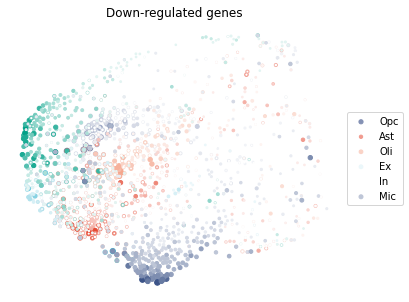

In [63]:
# show all together
plt.figure(figsize = (6,5))

for i, cell in enumerate(celltypes):
    
    index = np.where(M[:,i]<0)[0]
    plt.scatter(embedding[index,0], embedding[index,1], c=np.abs(M[index,i]), cmap=COL[i], s = np.abs(M[index,i]*10),label=cell)
    a = plt.gca()
    a.axis('off')
    #plt.title(cell, fontsize=20)
    #plt.savefig('./pdf_figures//'+str(cell)+'umap.pdf')
    #plt.figure()
    #plt.legend()
plt.title('Down-regulated genes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('./pdf_figures/all_cells_down_umap.pdf',  bbox_inches='tight')

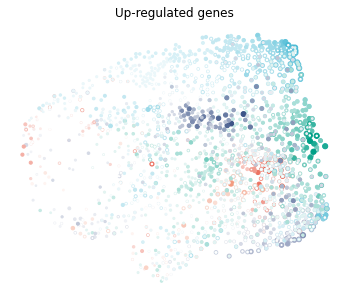

In [62]:
# show all together
plt.figure(figsize = (6,5))

for i, cell in enumerate(celltypes):
    
    index = np.where(M[:,i]>0)[0]
    plt.scatter(embedding[index,0], embedding[index,1], c=np.abs(M[index,i]), cmap=COL[i], s = np.abs(M[index,i]*10), label=cell)
    a = plt.gca()
    a.axis('off')
    #plt.title(cell, fontsize=20)
    #plt.savefig('./pdf_figures//'+str(cell)+'umap.pdf')
    #plt.figure()
    #plt.legend()
plt.title('Up-regulated genes')
plt.savefig('./pdf_figures/all_cells_up_umap.pdf',  bbox_inches='tight')

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f07e669e550>
Traceback (most recent call last):
  File "/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exce

(-37.810448455810544,
 42.465599822998044,
 -9.07319688796997,
 63.302175998687744)

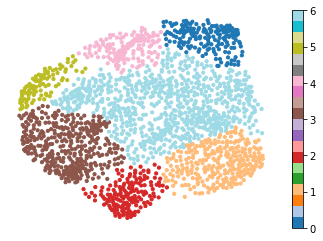

In [64]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import cosine_similarity

i = 0
# plot cosine similarity ordered by label
x = cosine_similarity(embedding)
x.shape

clusterer = SpectralClustering(7)#, #affinity='precomputed')
lab = clusterer.fit_predict(embedding)

plt.scatter(embedding[:,0], embedding[:,1], c=lab, cmap='tab20', s=10)#s = np.abs(expression[i][gene_index_a][gene_index2][gene_index3]*10))
plt.colorbar()
a = plt.gca()
a.axis('off')


In [65]:
content = pd.read_csv('../../../TsaiMadry_shared/clusters/GO_Biological_Process_2023_subset_mat.csv', index_col='Unnamed: 0')

In [66]:
def hyper_p(curr, genes, mat_hat_hat, index, temp):
    n = len(curr) # number of cluster genes
    M = len(genes) # total number of genes
    N = np.sum(mat_hat_hat[:,index]) # total number of pathway members
    x = np.sum(temp[:,index]) # observed overlap of cluster genes and pathway
    return 1 - hypergeom.cdf(x, M, n, N), x

In [67]:
content_T = np.array(content).T
content_T.shape

(9434, 4398)

In [68]:

from scipy.stats import hypergeom
names = []
content_T = np.array(content).T
paths = np.array(content.index)

for i in np.unique(lab):
    curr = set(genes[lab==i])
    temp = content_T[np.array([x in curr for x in content.columns])]
    pvals = [hyper_p(curr, genes, content_T, x, temp) for x in range(content_T.shape[1])]
    counts = [x[1] for x in pvals]
    pvals = [x[0] for x in pvals]
    
    df = pd.DataFrame(np.concatenate((paths.reshape(-1,1), np.array(pvals).reshape(-1,1), np.array(counts).reshape(-1,1)), axis=1))
    df = df[df[1]<0.05]
    name1 = np.array(df.iloc[np.argsort(np.array(df[1]))][0])[0].split(' (')[0] 
    name2 = np.array(df.iloc[np.argsort(np.array(df[1]))][0])[1].split(' (')[0] 
    name3 = np.array(df.iloc[np.argsort(np.array(df[1]))][0])[2].split(' (')[0]
    name4 = np.array(df.iloc[np.argsort(np.array(df[1]))][0])[3].split(' (')[0]
    name5 = np.array(df.iloc[np.argsort(np.array(df[1]))][0])[4].split(' (')[0]
    #name = np.array(df.iloc[np.argsort(-1*np.array(df[2]))][0])[0].split(' (')[0] 
    names.append(name1+'\n'+name2+'\n'+name3)#+'\n'+name4+'\n'+name5)

dictionary = dict(zip(np.unique(lab), names))
N = np.array([dictionary[x] for x in lab])

/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


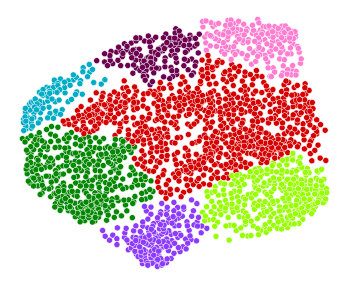

In [69]:
plt.figure(figsize = (6,5))

import seaborn as sns
import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=len(np.unique(N)))

sns.scatterplot(embedding[:,0], embedding[:,1], hue = N, palette=palette, legend=False)
legend = plt.legend(ncol=1, bbox_to_anchor=(1, 1), frameon=False, fontsize=12, scatterpoints=1, markerscale=2)

a = plt.gca()
a.axis('off')
#plt.autoscale()

plt.savefig('./pdf_figures/cluster_overview.pdf', bbox_inches='tight')


In [70]:
len(np.mean(M, axis=1))

1958

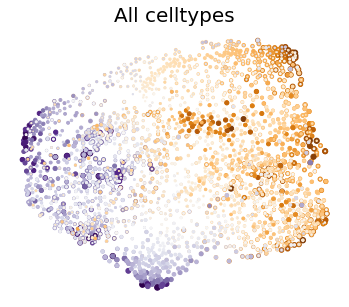

In [71]:
plt.figure(figsize = (6,5))
celltypes = np.array(expression.columns)

for i, cell in enumerate(celltypes):
    

    plt.scatter(embedding[:,0], embedding[:,1], c=M[:,i], cmap='PuOr_r', s = np.abs(M[:,i]*10))
    a = plt.gca()
    a.axis('off')
    plt.title('All celltypes', fontsize=20)
    plt.savefig('./pdf_figures//'+str(cell)+'umap_exp_overview.pdf')
    #plt.figure()
    

(-37.810448455810544,
 42.465599822998044,
 -9.07319688796997,
 63.302175998687744)

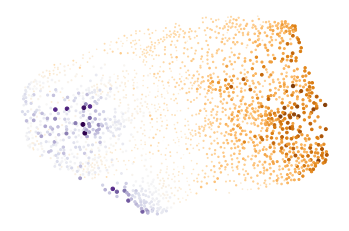

In [72]:
plt.scatter(embedding[:,0], embedding[:,1], c=np.mean(M, axis=1), cmap='PuOr_r', s = np.abs(np.mean(M, axis=1)*10))

a = plt.gca()
a.axis('off')
#plt.autoscale()

#plt.savefig('./pdf_figures/expression_overview.pdf', bbox_inches='tight')


In [73]:
# from: https://stackoverflow.com/questions/4534480/get-legend-as-a-separate-picture-in-matplotlib
def export_legend(legend, filename="legend.png", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)


In [74]:
export_legend(legend, './pdf_figures/legend.png')

/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/seaborn/relational.py:654: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  kws["alpha"] = 1 if self.alpha == "auto" else self.alpha
/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

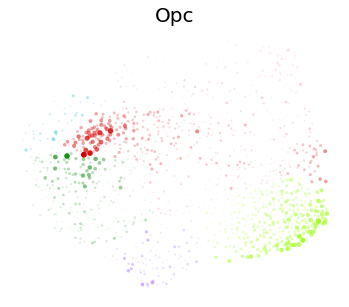

<Figure size 432x288 with 0 Axes>

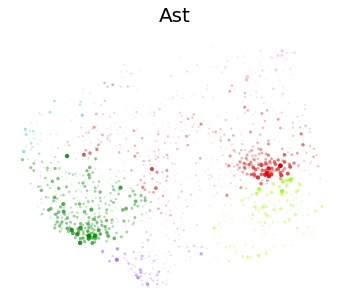

<Figure size 432x288 with 0 Axes>

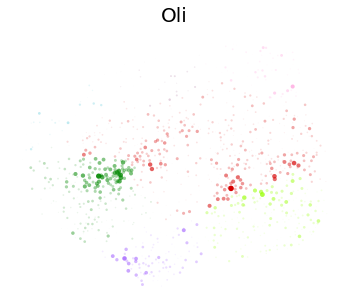

<Figure size 432x288 with 0 Axes>

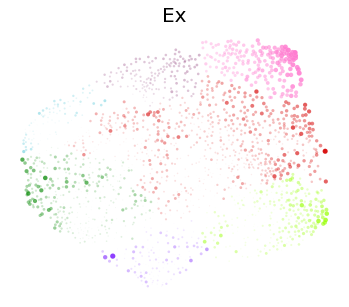

<Figure size 432x288 with 0 Axes>

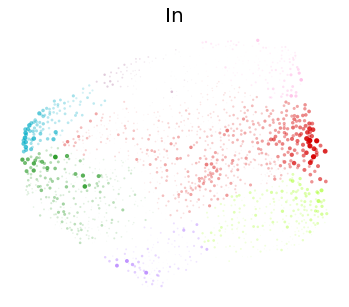

<Figure size 432x288 with 0 Axes>

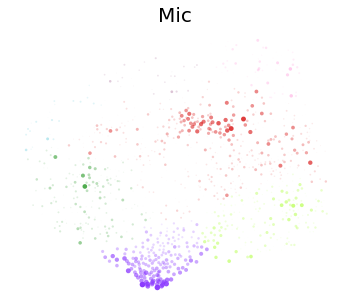

<Figure size 432x288 with 0 Axes>

In [75]:

celltypes = np.array(expression.columns)

for i, cell in enumerate(celltypes):
    plt.figure(figsize = (6,5))

    sns.scatterplot(embedding[:,0], embedding[:,1], hue = N, palette=palette, legend=False, s=np.abs(M[:,i]*10), alpha=np.abs(M[:,i])/np.max(np.abs(M[:,i])))

    a = plt.gca()
    a.axis('off')
    plt.title(cell, fontsize=20)
    plt.savefig('./pdf_figures//'+str(cell)+'umap_clust.pdf')
    plt.figure()
    

In [97]:
np.max(np.abs(M))

3.44881736705837

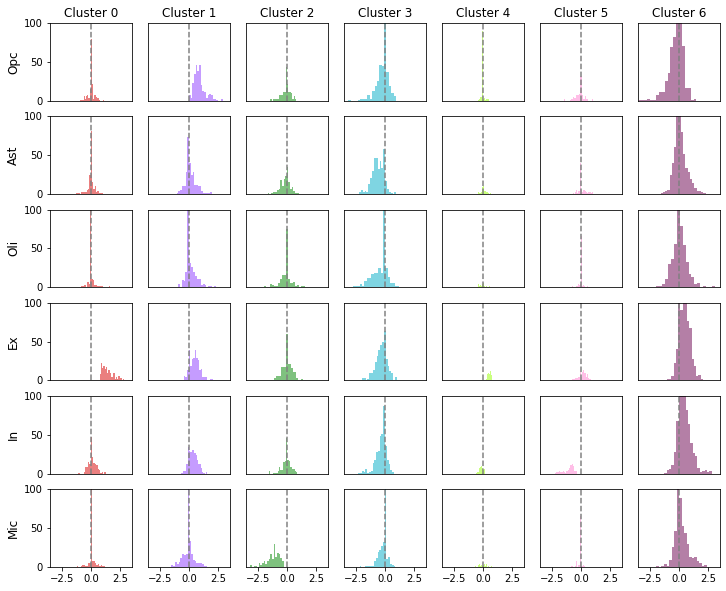

In [127]:

# score each cluster by celltype
lab_indices = np.empty(shape=(len(lab), len(np.unique(lab))))
for i, L in enumerate(np.unique(lab)):
    lab_indices[:,i] = lab==L

    
df = pd.DataFrame(np.matmul((M.T), lab_indices)/np.sum(lab_indices, axis=0))
df.index = celltypes
df.columns = np.unique(lab)

fig, axs = plt.subplots(6, 7)
fig.set_size_inches(12, 10)

for x in range(len(celltypes)):

    for i in np.unique(lab):
        axs[x,i].hist(M.T[x][lab==i], alpha=0.5, color=palette[i], bins=20, label=str(i))
        #axs[x,i].axvline(x=np.mean(M.T[x][lab==i]), color=palette[i])
        axs[x,i].axvline(x=0, color='grey', linestyle='--')
        axs[x,i].set_xlim([-3.5,3.5])
        axs[x,i].set_ylim([0,100])
        #ax.yaxis.set_label_position("right")
        
        if x < 5:
            axs[x,i].xaxis.set_visible(False)
        if i > 0:
            axs[x,i].yaxis.set_visible(False)
            
    #plt.title(celltypes[x])
    #plt.legend()
    #plt.savefig('./pdf_figures//'+str(celltypes[x])+'hist.pdf')
    #plt.figure()
   
rows = ['{}'.format(col) for col in celltypes]
cols = ['Cluster {}'.format(row) for row in np.unique(lab)]

for ax, col in zip(axs[0], cols):
    ax.set_title(col)

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='large')

plt.savefig('./pdf_figures/cluster_hist.pdf')

/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


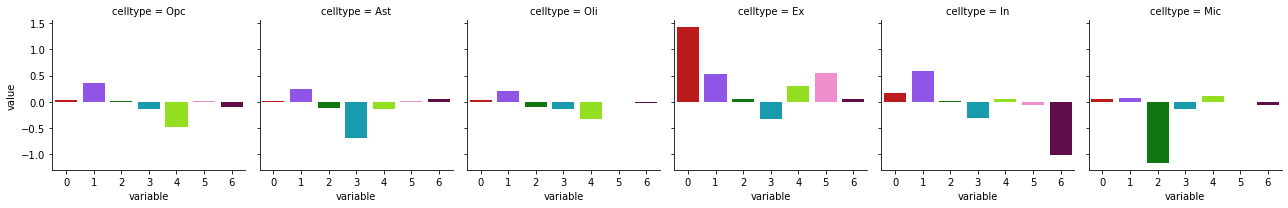

In [136]:
g = sns.FacetGrid(temp, col="celltype")
g.map_dataframe(sns.barplot,data=temp,x='variable', y='value', hue='variable', palette=palette, dodge=False)
plt.savefig('./pdf_figures/clusters_barplot.pdf')


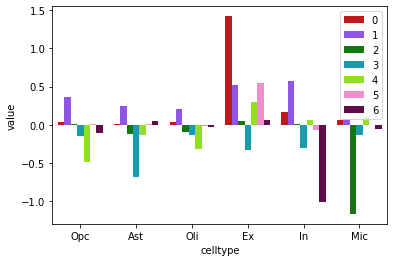

In [125]:
df['celltype'] = df.index
temp = pd.melt(df, id_vars='celltype')
sns.barplot(data=temp,x='celltype', y='value', hue='variable', palette=palette)
plt.legend(loc='upper right')
plt.savefig('./pdf_figures/clusters_barplot.pdf')


In [ ]:
# then show individual pathways for each celltype
# in next figure show clustering results (kernighan?) on changing pathways only in Ex (other celltypes in supplement)
# highlight main clusters of interest in subsequent figures

In [197]:
df

,0,1,2,3,4,5,6
Opc,0.924922,232.839799,1.364766,-38.319671,-11.174822,7.336308,-168.203794
Ast,2.007454,157.142577,-21.177889,-184.423965,5.308273,0.981364,-47.332463
Oli,-2.057229,133.685745,-17.481492,-35.228803,-3.367711,6.372434,-113.008895
Ex,79.405652,334.997700,9.414335,-88.426249,6.250925,265.859400,105.753357
In,-9.382628,369.579516,1.464149,-82.698291,-105.542610,30.675696,19.297118
Mic,-0.231592,49.581004,-201.100661,-35.004039,-6.043215,10.326319,35.404793


In [155]:
dictionary[6]

'Postsynaptic Membrane Assembly\nRac Protein Signal Transduction\nClathrin Coat Assembly\nPostsynapse Assembly\nNegative Regulation Of Inclusion Body Assembly'

In [146]:
lab==5

array([False, False, False, ..., False, False, False])

In [136]:
lab_indices

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])